# Algorithms

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tabulate import tabulate

### Ucitavanje pretprocesiranih podataka

In [2]:
def dataset_partitioning(X_balanced, y_balanced):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.111, random_state=42, stratify=y_balanced)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

    print('Broj ciljnih vrednosti \'closed\' u trening skupu:', np.sum(y_train==0))
    print('Broj ciljnih vrednosti \'closed\' u test skupu:', np.sum(y_test==0))
    print('Broj ciljnih vrednosti \'closed\' u validacionom skupu:', np.sum(y_val==0))
    return X_train, y_train, X_test, y_test, X_val, y_val

In [3]:
X_oversampling = pd.read_csv('oversampling_x.csv')
y_oversampling = pd.read_csv('oversampling_y.csv')
y_oversampling = y_oversampling.values.reshape(-1)

In [4]:
X_train_o, y_train_o, X_test_o, y_test_o, X_val_o, y_val_o = dataset_partitioning(X_oversampling, y_oversampling)

Broj ciljnih vrednosti 'closed' u trening skupu: 12960
Broj ciljnih vrednosti 'closed' u test skupu: 1799
Broj ciljnih vrednosti 'closed' u validacionom skupu: 1440


In [5]:
X_undersampling = pd.read_csv('undersampling_x.csv')
y_undersampling = pd.read_csv('undersampling_y.csv')
dfTarget = pd.concat([X_undersampling, y_undersampling], axis=1)
dfTarget = dfTarget.rename(columns={0: 'status'})
y_undersampling = y_undersampling.values.reshape(-1)

In [6]:
# X_undersampling

In [7]:
# y_undersampling

In [8]:
# dfTarget

In [9]:
X_train_u, y_train_u, X_test_u, y_test_u, X_val_u, y_val_u = dataset_partitioning(X_undersampling, y_undersampling)

Broj ciljnih vrednosti 'closed' u trening skupu: 355
Broj ciljnih vrednosti 'closed' u test skupu: 50
Broj ciljnih vrednosti 'closed' u validacionom skupu: 39


## Precision, recall i F1 mera: za manjinsku klasu i ceo dataset

In [10]:
def get_precision_recall_f1score_for_minority_class(y_test, y_test_pred):
    y_test1 = np.array(y_test)
    y_test_pred1 = np.array(y_test_pred)

    # Izdvajanje indeksa gde se nalaze vrednosti 0 u y_test
    idx = np.where(y_test1 == 0)[0]

    # Izdvajanje samo vrednosti 0 iz y_test i y_test_pred pomocu indeksa
    y_test1 = y_test1[idx]
    y_test_pred1 = y_test_pred1[idx]

    precision = precision_score(y_test1, y_test_pred1, pos_label=0)
    recall = recall_score(y_test1, y_test_pred1, pos_label=0)
    f1 = f1_score(y_test1, y_test_pred1, pos_label=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)

In [11]:
def get_precision_recall_f1score(y_test, y_test_pred):
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)

## Random Forest 

In [12]:
def random_forest(X_train, y_train, X_test, y_test, n_estimator): 
    rfc = RandomForestClassifier(n_estimators=n_estimator)

    rfc.fit(X_train, y_train)

    y_test_pred = rfc.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)

    print("Random Forest accuracy:", accuracy)
    return y_test_pred, accuracy

In [13]:
# Random Forest - undersampling
y_pred_rnd_forest_u, acc_rnd_forest_u = random_forest(X_train_u, y_train_u, X_test_u, y_test_u, 10)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_rnd_forest_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_rnd_forest_u)

Random Forest accuracy: 0.7474747474747475

Precision recall i f1 mera nad celim skupom: 
Precision:  0.7857142857142857
Recall:  0.673469387755102
F1-score:  0.7252747252747253

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.82
F1-score:  0.9010989010989011


In [14]:
# Random Forest - oversampling
y_pred_rnd_forest_o, acc_rnd_forest_o = random_forest(X_train_o, y_train_o, X_test_o, y_test_o, 10)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_rnd_forest_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_rnd_forest_o)

Random Forest accuracy: 0.9788712816235752

Precision recall i f1 mera nad celim skupom:
Precision:  0.9831649831649831
Recall:  0.9744160177975528
F1-score:  0.9787709497206702

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.9833240689271817
F1-score:  0.991591928251121


## Linearna regresija (TODO: nije na spisku - obrisati?)

In [15]:
def linear_regression(X_train, y_train, X_test, y_test):
    reg = LinearRegression()

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    # racunanje srednje kvadratne greške
    mse = mean_squared_error(y_test, y_pred)
    
    accuracy = reg.score(X_test, y_test)

#     print("Koeficijenti regresije:", reg.coef_)
#     print("Intercept:", reg.intercept_)
    print("Linear regression mse:", mse)
    print("Linear regression accuracy:", accuracy)
    return y_pred

In [16]:
y_pred_lin_u = linear_regression(X_train_u, y_train_u, X_test_u, y_test_u)

Linear regression mse: 1.1441904440890281e+23
Linear regression accuracy: -4.577228792863904e+23


In [17]:
y_pred_lin_o = linear_regression(X_train_o, y_train_o, X_test_o, y_test_o)

Linear regression mse: 0.18947176102104538
Linear regression accuracy: 0.24211289733928865


## Logisticka regresija

In [18]:
def logistic_regression(X_train, y_train, X_test, y_test):
    lr_model = LogisticRegression(max_iter=1000)

    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    accuracy = lr_model.score(X_test, y_test)

    print("Logistic regression accuracy:", accuracy)
    return y_pred, accuracy

In [19]:
y_pred_logistic_u, acc_logistic_u = logistic_regression(X_train_u, y_train_u, X_test_u, y_test_u)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_logistic_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_logistic_u)

Logistic regression accuracy: 0.6767676767676768

Precision recall i f1 mera nad celim skupom: 
Precision:  0.6545454545454545
Recall:  0.7346938775510204
F1-score:  0.6923076923076923

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.62
F1-score:  0.7654320987654321


In [20]:
y_pred_logistic_o, acc_logistic_o = logistic_regression(X_train_o, y_train_o, X_test_o, y_test_o)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_logistic_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_logistic_o)

Logistic regression accuracy: 0.6966916875173756

Precision recall i f1 mera nad celim skupom:
Precision:  0.7049275362318841
Recall:  0.6763070077864294
F1-score:  0.6903207493613398

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.717065036131184
F1-score:  0.8352217546131434


## K-Nearest Neighbour

In [21]:
def knn(X_train, y_train, X_test, y_test, n_neighbors=5):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("KNN accuracy: ", accuracy)
    return y_pred, accuracy

In [22]:
y_pred_knn_u, acc_knn_u = knn(X_train_u, y_train_u, X_test_u, y_test_u)
#y_pred_knn_u = knn(X_train_u, y_train_u, X_test_u, y_test_u, 3) 
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_knn_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_knn_u)

KNN accuracy:  0.6060606060606061

Precision recall i f1 mera nad celim skupom: 
Precision:  0.6041666666666666
Recall:  0.5918367346938775
F1-score:  0.5979381443298969

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.62
F1-score:  0.7654320987654321


In [23]:
# y_pred_knn_o =knn(X_train_o, y_train_o, X_test_o, y_test_o)
y_pred_knn_o, acc_knn_o = knn(X_train_o, y_train_o, X_test_o, y_test_o, 3)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_knn_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_knn_o)

KNN accuracy:  0.9502363080344731

Precision recall i f1 mera nad celim skupom:
Precision:  0.999383096853794
Recall:  0.9010011123470523
F1-score:  0.947645510383153

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.9994441356309061
F1-score:  0.9997219905476786


## Decision tree

In [24]:
def decision_tree(X_train, y_train, X_test, y_test, max_depth=None, min_samples_split=2):
    dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    
    dtc.fit(X_train, y_train)
    
    y_pred = dtc.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Decision tree accuracy: ", accuracy)
    return y_pred, accuracy

In [25]:
y_pred_dt_u, acc_dt_u = decision_tree(X_train_u, y_train_u, X_test_u, y_test_u)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_dt_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_dt_u)

Decision tree accuracy:  0.6666666666666666

Precision recall i f1 mera nad celim skupom: 
Precision:  0.6538461538461539
Recall:  0.6938775510204082
F1-score:  0.6732673267326732

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.64
F1-score:  0.7804878048780487


In [26]:
y_pred_dt_o, acc_dt_o = decision_tree(X_train_o, y_train_o, X_test_o, y_test_o) # !!
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_dt_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_dt_o)

Decision tree accuracy:  0.9591326105087573

Precision recall i f1 mera nad celim skupom:
Precision:  0.9698349459305634
Recall:  0.9477196885428254
F1-score:  0.9586497890295358

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.9705391884380211
F1-score:  0.9850493653032439


## Bagging 

In [27]:
def bagging(X_train, y_train, X_test, y_test):
    base_model = DecisionTreeClassifier()

    bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

    bagging_model.fit(X_train, y_train)
    
    y_pred = bagging_model.predict(X_test)

    accuracy = bagging_model.score(X_test, y_test)
    print("Bagging accuracy:", accuracy)
    return y_pred, accuracy

In [28]:
y_pred_bagg_u, acc_bagg_u = bagging(X_train_u, y_train_u, X_test_u, y_test_u)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_bagg_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_bagg_u)

Bagging accuracy: 0.7474747474747475

Precision recall i f1 mera nad celim skupom: 
Precision:  0.7857142857142857
Recall:  0.673469387755102
F1-score:  0.7252747252747253

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.82
F1-score:  0.9010989010989011


In [29]:
y_pred_bagg_o, acc_bagg_o = bagging(X_train_o, y_train_o, X_test_o, y_test_o)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_bagg_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_bagg_o)

Bagging accuracy: 0.9785932721712538

Precision recall i f1 mera nad celim skupom:
Precision:  0.9853355893965031
Recall:  0.9716351501668521
F1-score:  0.9784374124894989

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.9855475264035576
F1-score:  0.9927211646136619


## XGBoost

In [30]:
def xgboost(X_train, y_train, X_test, y_test):
    xgb_model = xgb.XGBClassifier()

    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)

    accuracy = xgb_model.score(X_test, y_test)
    print("XGBoost accuracy:", accuracy)
    return y_pred, accuracy

In [31]:
def optimize_hyperparameters(model, X_train, y_train, X_test, y_test):
    #TODO: srediti
    param_grid = {'max_depth': [3, 4, 5],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'n_estimators': [50, 100, 200]}
                # 'subsample': [0.6, 0.8, 1.0],
                # 'colsample_bytree': [0.6, 0.8, 1.0]}

    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

    y_pred = grid_search.fit(X_train, y_train)

    accuracy = grid_search.score(X_test, y_test)
    print('Optimizing hyperparameters:', accuracy)
    return y_pred

In [32]:
y_pred_xgb_u, acc_xgb_u = xgboost(X_train_u, y_train_u, X_test_u, y_test_u)
print("\nPrecision recall i f1 mera nad celim skupom: ")
get_precision_recall_f1score(y_test_u, y_pred_xgb_u)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_u, y_pred_xgb_u)

XGBoost accuracy: 0.7575757575757576

Precision recall i f1 mera nad celim skupom: 
Precision:  0.7659574468085106
Recall:  0.7346938775510204
F1-score:  0.7499999999999999

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.78
F1-score:  0.8764044943820225


In [33]:
y_pred_xgb_o, acc_xgb_o = xgboost(X_train_o, y_train_o, X_test_o, y_test_o)
print("\nPrecision recall i f1 mera nad celim skupom:")
get_precision_recall_f1score(y_test_o, y_pred_xgb_o)
print("\nPrecision recall i f1 mera nad manjinskoj klasi:")
get_precision_recall_f1score_for_minority_class(y_test_o, y_pred_xgb_o)

XGBoost accuracy: 0.9833194328607172

Precision recall i f1 mera nad celim skupom:
Precision:  0.9790518191841234
Recall:  0.9877641824249166
F1-score:  0.9833887043189369

Precision recall i f1 mera nad manjinskoj klasi:
Precision:  1.0
Recall:  0.9788771539744302
F1-score:  0.9893258426966292


In [34]:
# dugo traje
# optimize_hyperparameters(xgb_model_u, X_train_u, y_train_u, X_test_u, y_test_u)

## Matrica konfuzije

In [35]:
def plot_confusion_matrix(y_true, y_pred, algorithm):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    classes = ['successful', 'closed']
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(algorithm)
    plt.show()

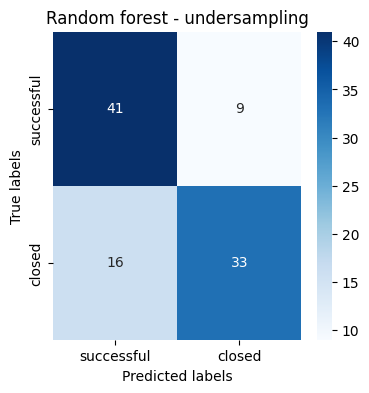

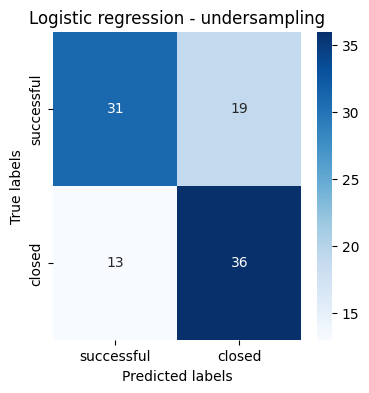

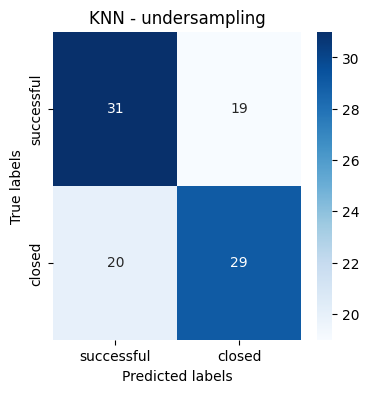

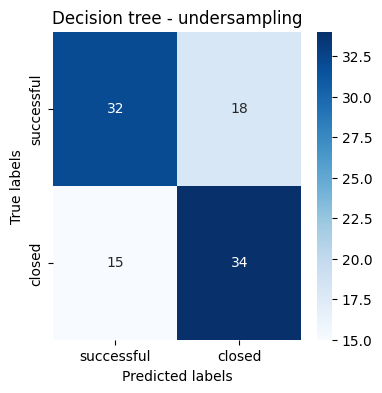

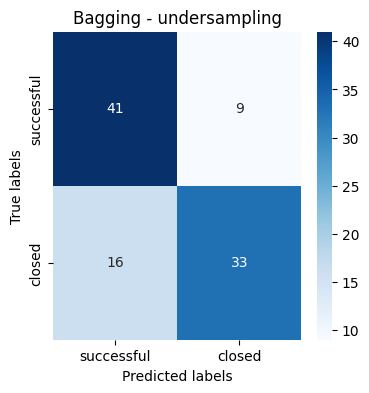

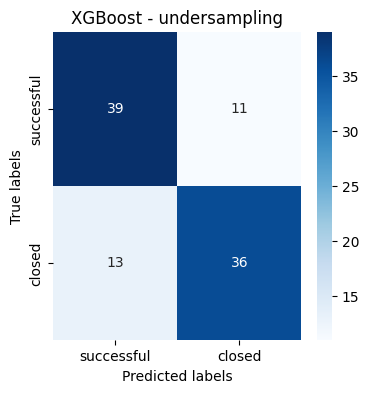

In [36]:
# undersampling
plot_confusion_matrix(y_test_u, y_pred_rnd_forest_u, 'Random forest - undersampling')
plot_confusion_matrix(y_test_u, y_pred_logistic_u, 'Logistic regression - undersampling')
plot_confusion_matrix(y_test_u, y_pred_knn_u, 'KNN - undersampling')
plot_confusion_matrix(y_test_u, y_pred_dt_u, 'Decision tree - undersampling')
plot_confusion_matrix(y_test_u, y_pred_bagg_u, 'Bagging - undersampling')
plot_confusion_matrix(y_test_u, y_pred_xgb_u, 'XGBoost - undersampling')

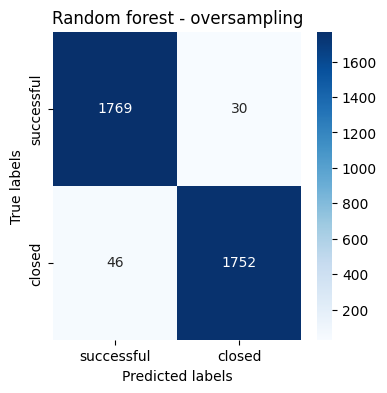

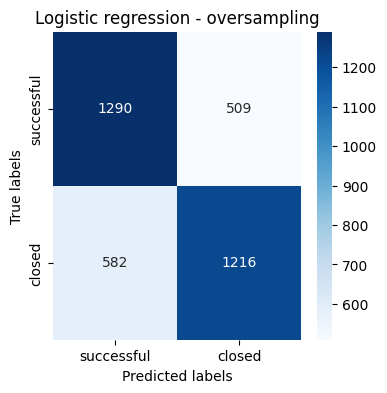

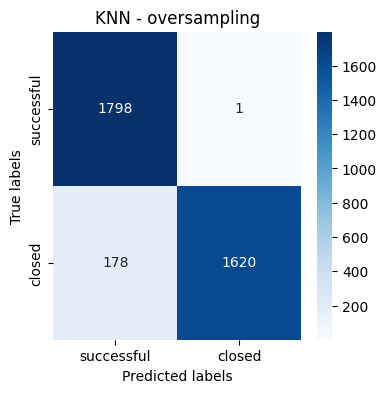

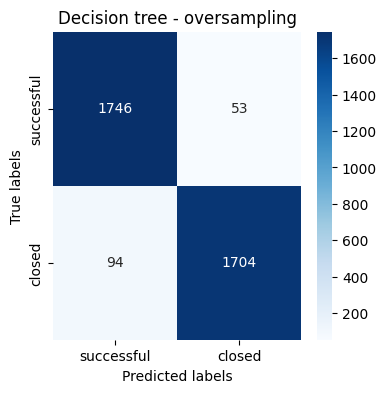

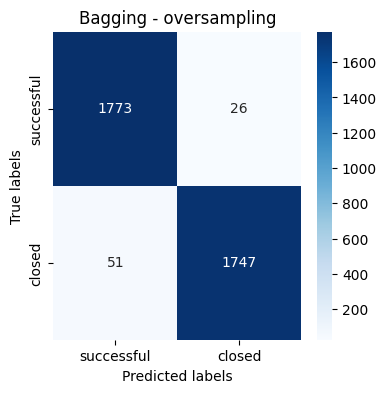

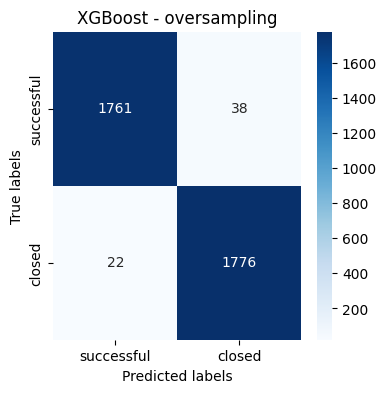

In [37]:
# oversampling
plot_confusion_matrix(y_test_o, y_pred_rnd_forest_o, 'Random forest - oversampling')
plot_confusion_matrix(y_test_o, y_pred_logistic_o, 'Logistic regression - oversampling')
plot_confusion_matrix(y_test_o, y_pred_knn_o, 'KNN - oversampling')
plot_confusion_matrix(y_test_o, y_pred_dt_o, 'Decision tree - oversampling')
plot_confusion_matrix(y_test_o, y_pred_bagg_o, 'Bagging - oversampling')
plot_confusion_matrix(y_test_o, y_pred_xgb_o, 'XGBoost - oversampling')

In [38]:
def plot_algorithm_accuracies(accuracies, dataset_type):
    algorithms = ['Rnd Forest', 'Logistic regr', 'KNN', 'Decision tree', 'Bagging', 'XGBoost']

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(algorithms, accuracies)

    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy of different algorithms - ' + dataset_type)

    fig.subplots_adjust(bottom=0.5)
    plt.show()
    
    data = []
    for i in range(len(algorithms)):
        row = [algorithms[i], round(accuracies[i], 2)]
        data.append(row)

    headers = ['Algorithm', 'Accuracy']

    print(tabulate(data, headers=headers))


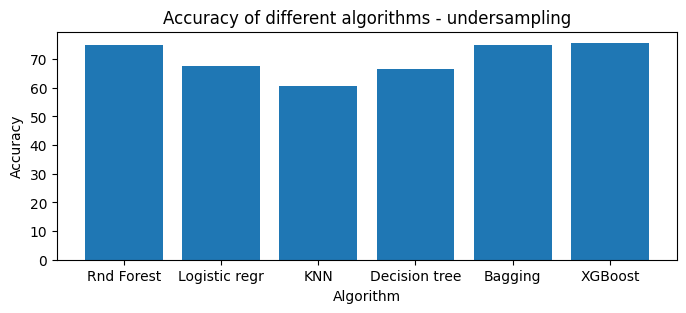

Algorithm        Accuracy
-------------  ----------
Rnd Forest          74.75
Logistic regr       67.68
KNN                 60.61
Decision tree       66.67
Bagging             74.75
XGBoost             75.76


In [39]:
accuracies_u = [acc_rnd_forest_u*100, acc_logistic_u*100, acc_knn_u*100, acc_dt_u*100, acc_bagg_u*100, acc_xgb_u*100]
plot_algorithm_accuracies(accuracies_u, 'undersampling')

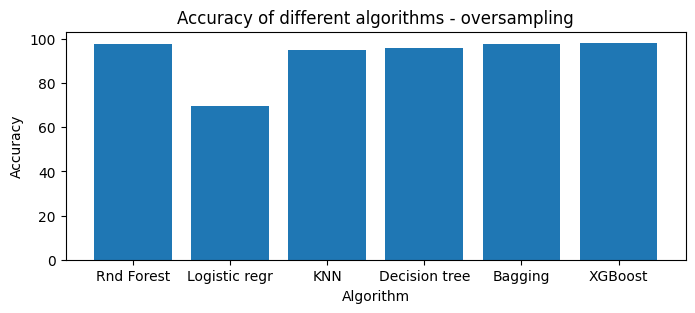

Algorithm        Accuracy
-------------  ----------
Rnd Forest          97.89
Logistic regr       69.67
KNN                 95.02
Decision tree       95.91
Bagging             97.86
XGBoost             98.33


In [40]:
accuracies_o = [acc_rnd_forest_o*100, acc_logistic_o*100, acc_knn_o*100, acc_dt_o*100, acc_bagg_o*100, acc_xgb_o*100]
plot_algorithm_accuracies(accuracies_o, 'oversampling')